In [ ]:
# Combined on-chain Analysis for CerebrumDAO evaluation

In [3]:
# Import datasets and first checks

import pandas as pd

# Paths to your data files
#twitter_path = "/Users/user/Documents/cerebrum-assignment/data/processed/cerebrumdao_twitter_all.csv"
transfers_eth_path = "/Users/user/Documents/cerebrum-assignment/data/processed/cerebrumdao_transfers.csv"
transfers_bs_path = "/Users/user/Documents/cerebrum-assignment/data/processed/cerebrumdao_transfers_bs.csv"
#snapshot_path = "/Users/user/Documents/cerebrum-assignment/data/processed/cerebrumdao_snapshot_proposals.csv"

# Load dataframes
#df_twitter = pd.read_csv(twitter_path)
df_eth = pd.read_csv(transfers_eth_path)
df_base = pd.read_csv(transfers_bs_path)
#df_snapshot = pd.read_csv(snapshot_path)

# Ethereum Transfers
print(df_eth.head())

# Base Transfers
print(df_base.head())


   blockNumber            timeStamp  \
0     22458932  2025-05-11 08:32:59   
1     22458757  2025-05-11 07:57:35   
2     22458652  2025-05-11 07:36:23   
3     22458264  2025-05-11 06:17:59   
4     22458264  2025-05-11 06:17:59   

                                                hash   nonce  \
0  0xeba706ae11b090787d71c02c6002001c7ef1277e225b...  302162   
1  0xa759af949c90b966190500da77928576d56cbec976f4...  332304   
2  0x81554f52712cce1c0d4bcf42405cb58194b8334fe156...  302123   
3  0x1aee39af89fadae35b3bd07c1311dfb4bccc9c0a8556...      16   
4  0x1aee39af89fadae35b3bd07c1311dfb4bccc9c0a8556...      16   

                                           blockHash  \
0  0x93f90cc0c72bebf806f5a27555ea90799386ceb50e0b...   
1  0x086bf98ba52923ff135125e2bc18849b329454540360...   
2  0xb1bbe5b84403fcb1214093deb677ac1ca9f4281691a0...   
3  0xe98f22491303f39ce6b8f40e2995133da6de4272b93e...   
4  0xe98f22491303f39ce6b8f40e2995133da6de4272b93e...   

                                         fr

In [4]:
# Standardize columns
for df in [df_eth, df_base]:
    df['timeStamp'] = pd.to_datetime(df['timeStamp'])
    df['from'] = df['from'].str.lower()
    df['to'] = df['to'].str.lower()

# Add a column to identify chain
df_eth['chain'] = 'ethereum'
df_base['chain'] = 'base'

# Concatenate for combined analysis
df_chain_all = pd.concat([df_eth, df_base], ignore_index=True)

In [24]:
# SAVE DataFrame to CSV. combined on-chain transations

df_chain_all.to_csv('cerebrumdao_chain_all.csv', index=False)

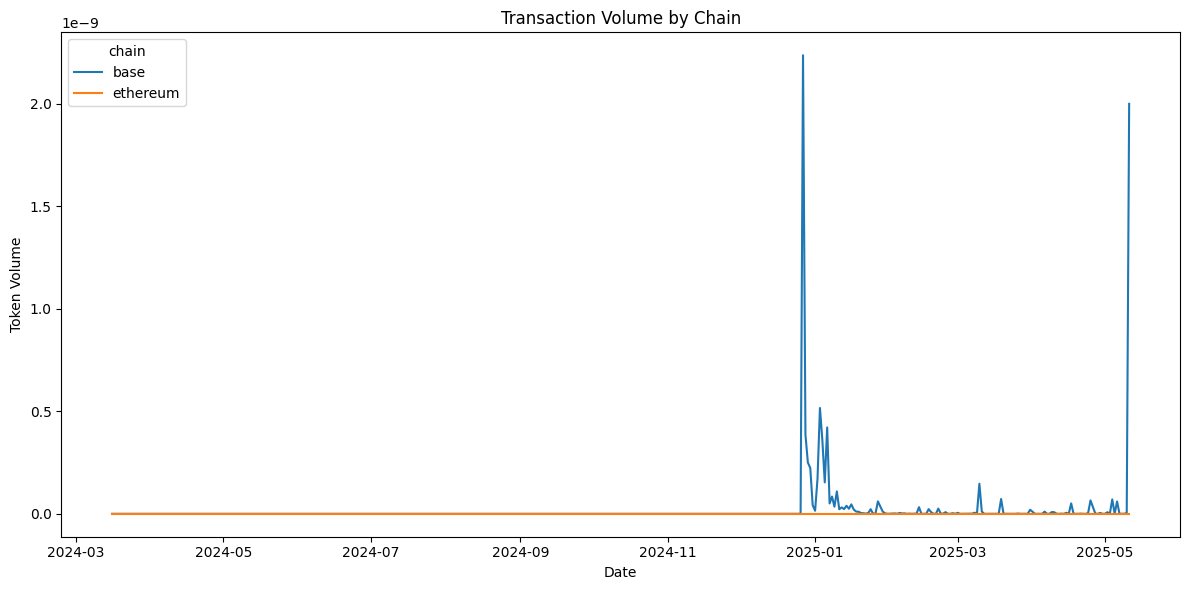

In [13]:
# Combine transaction volume over time on each chain. Etherscan looks flat

df_chain_all['date'] = df_chain_all['timeStamp'].dt.date
volume_by_chain = df_chain_all.groupby(['date', 'chain'])['value'].sum().unstack().fillna(0)

volume_by_chain.plot(figsize=(12,6), title='Transaction Volume by Chain')
plt.ylabel('Token Volume')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [9]:
# a first combined plotting showed a flat line for Etherscan transactions. Bebug checks
# values are non zero

print(df_eth['value'].describe())
print(df_eth['timeStamp'].min(), df_eth['timeStamp'].max())
print(df_eth['chain'].unique())

count    8.207000e+03
mean     2.589660e-29
std      9.692006e-28
min      0.000000e+00
25%      5.974697e-32
50%      4.527481e-31
75%      2.500000e-30
max      8.600000e-26
Name: value, dtype: float64
2024-03-16 13:09:23 2025-05-11 08:32:59
['ethereum']


In [10]:
# checking if we have no values

print(len(df_eth))
print(df_eth['from'].nunique(), df_eth['to'].nunique())

8207
1148 1899


In [11]:
# In March 2024 base was not launches and we see NaN
# Daily volumes by chain

print(volume_by_chain.head(10))

chain       base      ethereum
date                          
2024-03-16   NaN  8.600000e-26
2024-04-05   NaN  2.000000e-30
2024-04-06   NaN  2.081000e-26
2024-04-12   NaN  1.507687e-26
2024-04-15   NaN  8.600000e-28
2024-04-24   NaN  2.967000e-27
2024-04-25   NaN  4.214000e-27
2024-04-26   NaN  4.300000e-27
2024-04-30   NaN  3.211284e-27
2024-05-01   NaN  4.671807e-28


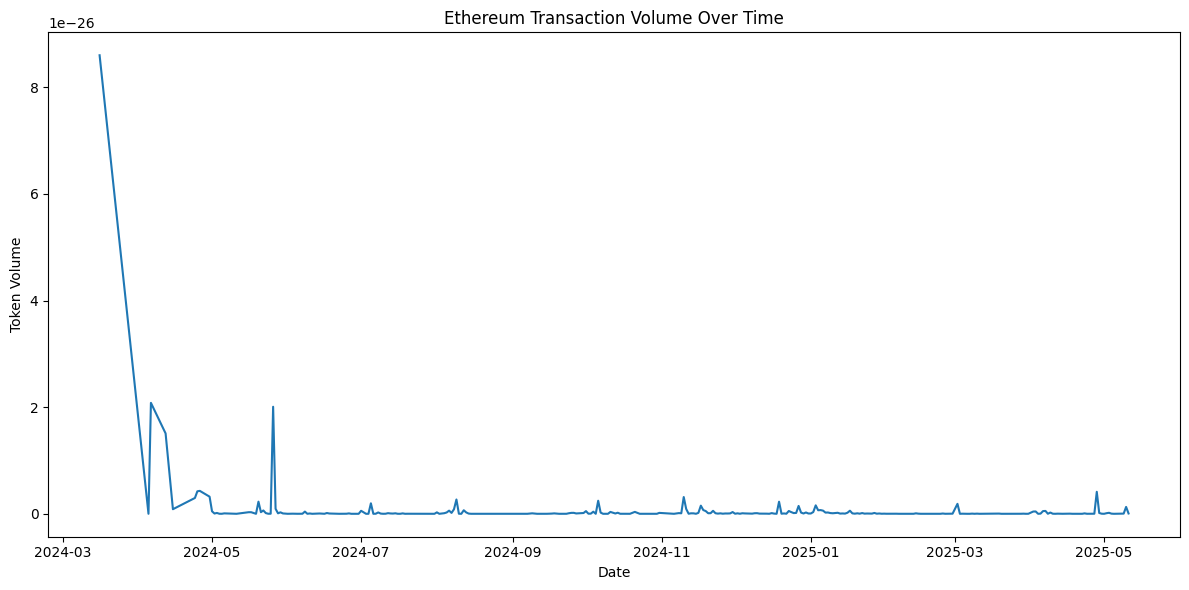

In [6]:
import matplotlib.pyplot as plt

# Filter for Ethereum only
df_eth['date'] = df_eth['timeStamp'].dt.date
eth_volume = df_eth.groupby('date')['value'].sum()

plt.figure(figsize=(12,6))
eth_volume.plot()
plt.title('Ethereum Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Token Volume')
plt.tight_layout()

plt.savefig('EthscanTransactions.png', dpi=300, bbox_inches='tight')  # Use fig.savefig, OR plt.savefig if not sub plotted
plt.show()

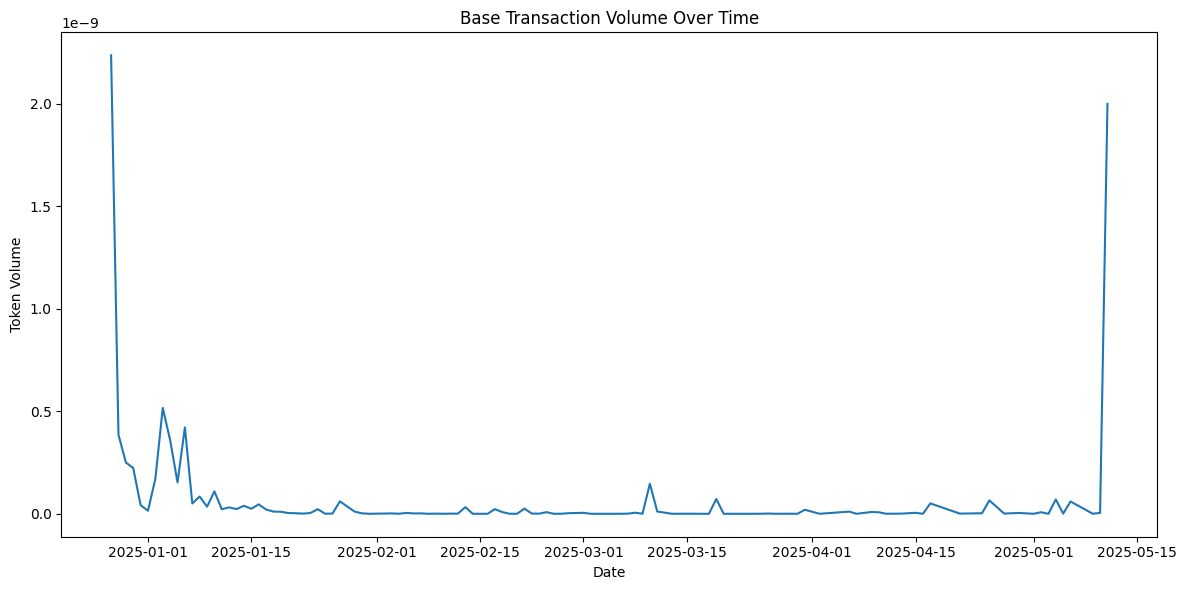

In [7]:
# Filter for Base only
# Whale activity on 11.05

df_base['date'] = df_base['timeStamp'].dt.date
base_volume = df_base.groupby('date')['value'].sum()

plt.figure(figsize=(12,6))
base_volume.plot()
plt.title('Base Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Token Volume')
plt.tight_layout()

plt.savefig('BasescanTransactions.png', dpi=300, bbox_inches='tight')  # Use fig.savefig, OR plt.savefig if not sub plotted
plt.show()

In [15]:
print("Ethereum:", df_eth['date'].min(), "to", df_eth['date'].max())
print("Base:", df_base['date'].min(), "to", df_base['date'].max())

Ethereum: 2024-03-16 to 2025-05-11
Base: 2024-12-27 to 2025-05-11


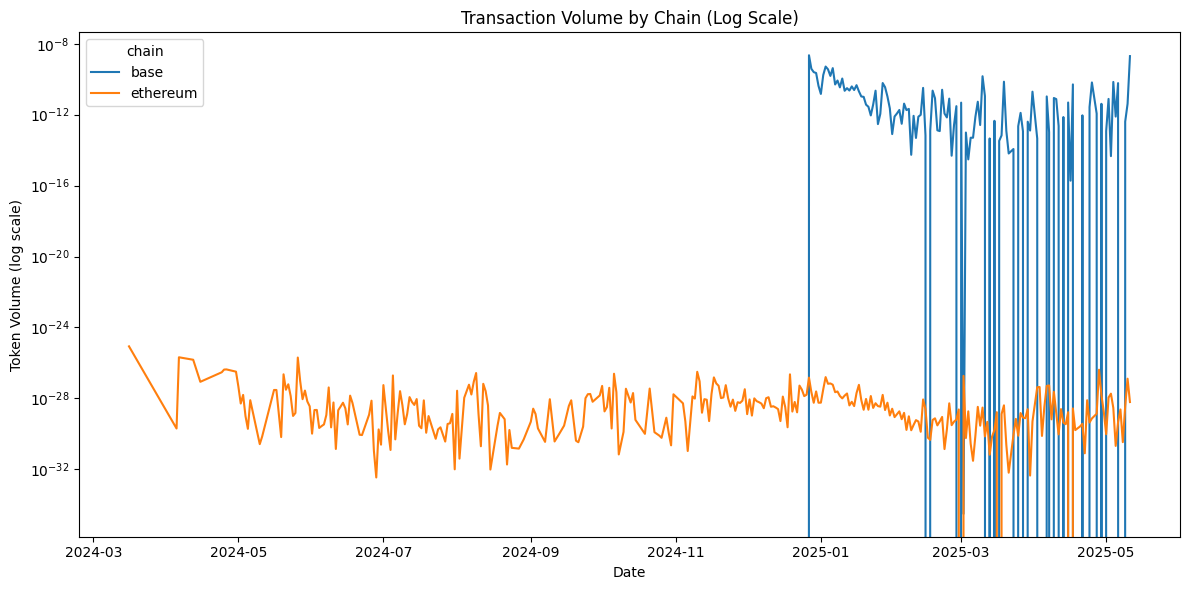

In [8]:
# try log scale to see smaller variations. We dont have access to the same timeframe for both chains
# Seems that since launch on Base, transactions are happening there. lower fees more agile

import matplotlib.pyplot as plt

# Make sure 'date' column exists
df_chain_all['date'] = df_chain_all['timeStamp'].dt.date

# Group by date and chain, sum the values, fill missing with 0
volume_by_chain = df_chain_all.groupby(['date', 'chain'])['value'].sum().unstack().fillna(0)

# Plot with log scale
volume_by_chain.plot(figsize=(12,6), title='Transaction Volume by Chain (Log Scale)', logy=True)
plt.ylabel('Token Volume (log scale)')
plt.xlabel('Date')
plt.tight_layout()

plt.savefig('CombinedTransactions.png', dpi=300, bbox_inches='tight')  # Use fig.savefig, OR plt.savefig if not sub plotted
plt.show()

In [9]:
# confirm decimal adjustement

df_eth['value'] = df_eth['value'].astype(float) / (10 ** 18)
df_base['value'] = df_base['value'].astype(float) / (10 ** 18)

In [10]:
# total volumes in each chain
# Ratio base/eth is 3.8 e+16. Big disproportion in favor of base
# highlighting a near-complete migration of activity to Base chain

print("Ethereum total volume:", df_eth['value'].sum())
#print("Ethereum transaction count:", len(df_eth))

print("Base total volume:", df_base['value'].sum())
#print("Base transaction count:", len(df_base))

Ethereum total volume: 2.125333784596652e-43
Base total volume: 8.107215716523613e-27


In [19]:
# date ranges
print("Ethereum date range:", df_eth['timeStamp'].min(), "to", df_eth['timeStamp'].max())
print("Base date range:", df_base['timeStamp'].min(), "to", df_base['timeStamp'].max())

Ethereum date range: 2024-03-16 13:09:23 to 2025-05-11 08:32:59
Base date range: 2024-12-27 04:11:41 to 2025-05-11 15:01:47


In [23]:
#> Summary:
#> “Transaction volume on Ethereum is significantly lower than on Base.
#> This is confirmed by both the total volume and the daily transaction plots.
#> The difference in y-axis scales (Ethereum: ~1e-26, Base: ~1e-9) reflects a migration of activity to Base
#> likely due to lower fees and higher user engagement.
#> Ethereum is used for infrequent or large transactions, while Base supports more frequent, smaller transactions.
#> This pattern is typical for DAOs optimizing for cost and participation.”
